# Python Plotting Showcase

In this notebook we demonstrate the most common (i.e. most useful?) plotting frameworks of Python. 
There are many, and unfortunately we do not have the dominant force like the R folk (with their ggplot2) do.
However, in the last years some new overarching framworks (like pyviz) emerged that aim to unify the plotting
landscape.

## Declarative plotting

- Grammer of Graphics  
- Perception  
- ...  

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Simple scatterplot

In [7]:
# get the data
import seaborn
df = seaborn.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Matplotlib

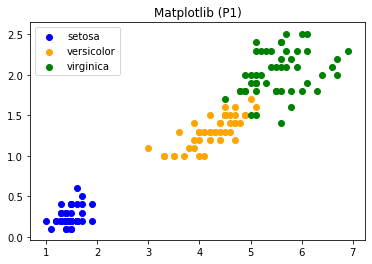

In [86]:
import matplotlib.pyplot as plt

# plot 1 - simple scatter
colors = {'setosa': 'blue', 'virginica':'green', 'versicolor':'orange'}
fig,ax = plt.subplots()
for g, gdf in df.groupby('species'):
    ax.scatter(gdf.petal_length, gdf.petal_width, color=colors[g], label=g);
plt.title('Matplotlib (P1)')
plt.legend();

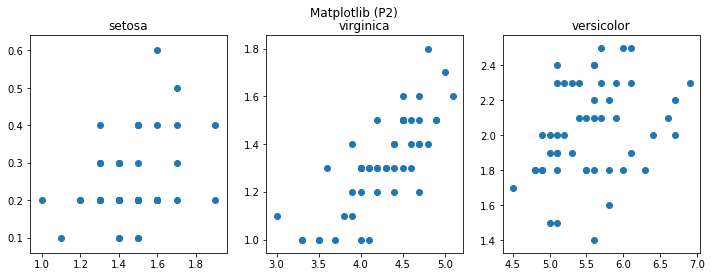

In [96]:
# plot 3 - facet plots side by side
fig,ax = plt.subplots(1,3, figsize=(12,4))
for i, (g, gdf) in enumerate(df.groupby('species')):
    ax[i].scatter(gdf.petal_length, gdf.petal_width);
    ax[i].set_title(list(colors.keys())[i])
plt.suptitle('Matplotlib (P2)');

### Pandas

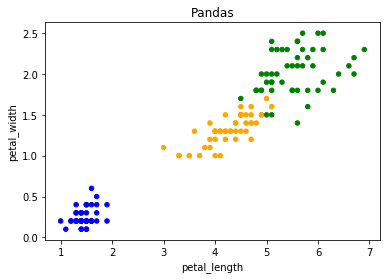

In [68]:
import pandas as pd
s_colors = df.species.map(colors)
df2.plot.scatter(x='petal_length', y='petal_width', c=df2.colors, title='Pandas');

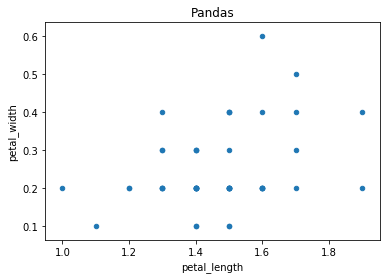

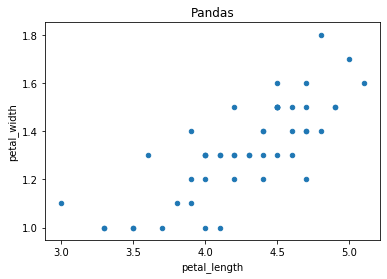

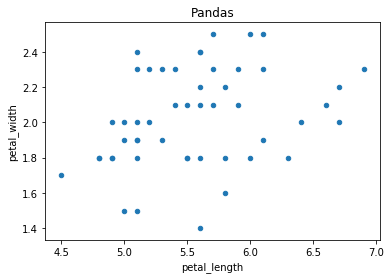

In [98]:
s_colors = df.species.map(colors)
df2.groupby('species').plot.scatter(x='petal_length', y='petal_width', title='Pandas');

### Seaborn

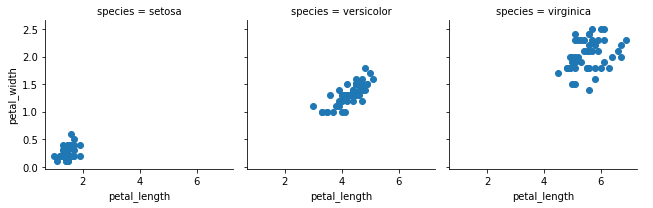

In [105]:
import seaborn as sns
g = sns.FacetGrid(df, col="species")
g.map(plt.scatter, 'petal_length', 'petal_width')
g.add_legend();

### Plotnine

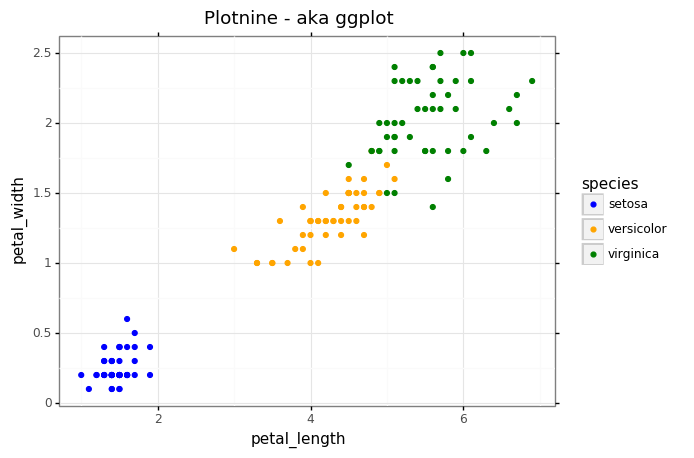

In [85]:
# suppres warning in 0.5.1
import warnings, matplotlib
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

from plotnine import *
p = ggplot(df, aes(x='petal_length', y='petal_width'))
p += geom_point(aes(color='species'))
p += scale_color_manual(colors)
p += labs(title='Plotnine - aka ggplot')
p += theme_bw()
p.draw();

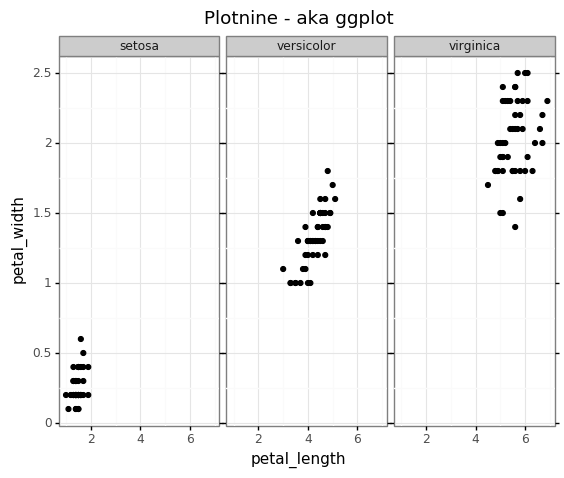

In [117]:
p = ggplot(df, aes(x='petal_length', y='petal_width'))
p += geom_point()
p += labs(title='Plotnine - aka ggplot')
p += facet_wrap('~species')
p += theme_bw() 
p.draw();

## Interactive Plotting libs
### hvplot

In [79]:
import hvplot.pandas
df.hvplot.scatter(x='petal_length', y='petal_width', c='species', width=500, title='hvplot')

:Scatter   [petal_length]   (petal_width,species)

In [114]:
import hvplot.pandas
df.hvplot.scatter(x='petal_length', y='petal_width', col='species', width=600, title='hvplot')

:GridSpace   [species]
   :Scatter   [petal_length]   (petal_width)

In [140]:
p1 = df.hvplot.hist('petal_length', by='species', bins=20, alpha=0.5, width=400)
p2 = df.hvplot.kde('sepal_length', by='species', alpha=0.5, width=400)
p1 + p2

:Layout
   .NdOverlay.I  :NdOverlay   [species]
      :Histogram   [petal_length]   (petal_length_count)
   .NdOverlay.II :NdOverlay   [species]
      :Distribution   [sepal_length]   (Density)

In [145]:
df.hvplot.scatter(x='petal_length', y='petal_width', groupby='species', width=400)

:DynamicMap   [species]
   :Scatter   [petal_length]   (petal_width)

### Altair

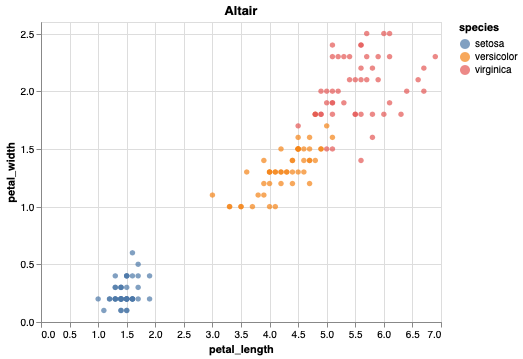

In [80]:
import altair as alt
alt.Chart(df, title='Altair').mark_circle().encode(
    alt.X('petal_length'),
    alt.Y('petal_width'),
    color='species'
)

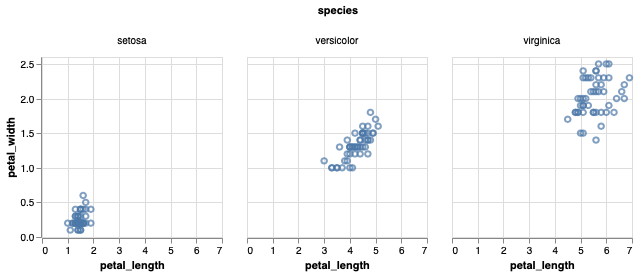

In [125]:
alt.Chart(df, title='Altair').mark_circle().encode(
    alt.X('petal_length'),
    alt.Y('petal_width'),
    color='species'
)

alt.Chart(df).mark_point().encode(
    x='petal_length',
    y='petal_width'
).properties(
    width=180,
    height=180
).facet(
    column='species'
)

## Encoding more information...

### Side by side plots

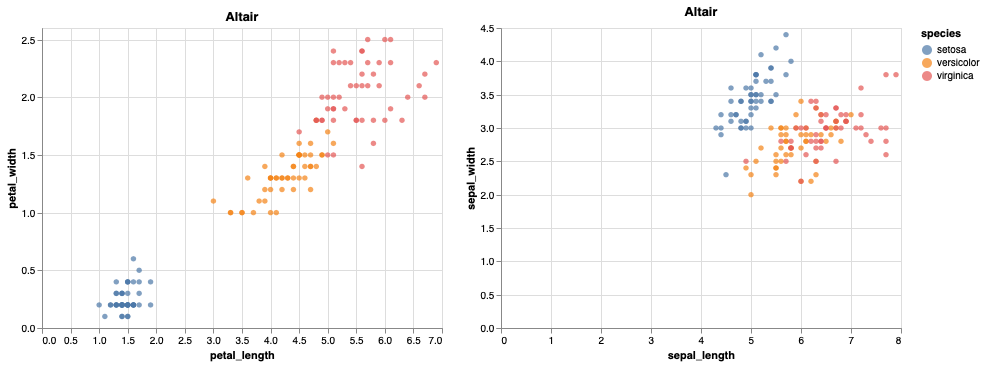

In [129]:
p1 = alt.Chart(df, title='Altair').mark_circle().encode(
        alt.X('petal_length'),
        alt.Y('petal_width'),
        color='species'
     )

p2 = alt.Chart(df, title='Altair').mark_circle().encode(
        alt.X('sepal_length'),
        alt.Y('sepal_width'),
        color='species'
     )

p1 | p2

## Adding a forth encoding (size in this case)

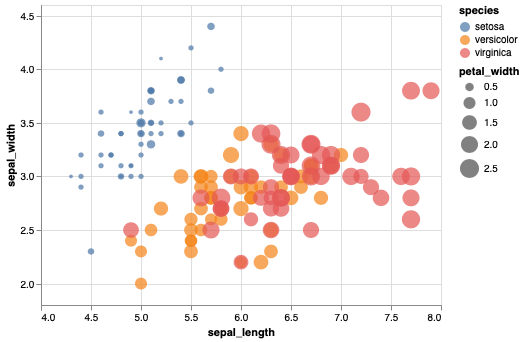

In [130]:
alt.Chart(df).mark_circle().encode(
    alt.X('sepal_length', scale=alt.Scale(zero=False)),
    alt.Y('sepal_width', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petal_width'
)

## Adding interactivity (selections)

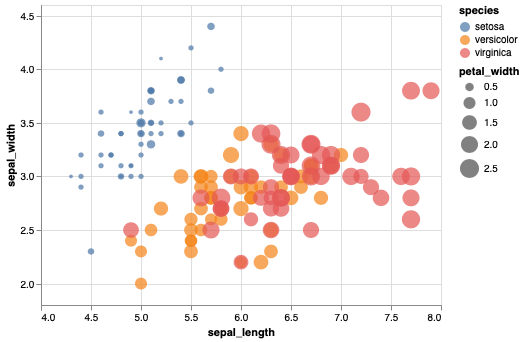

In [83]:
# version 2
alt.Chart(df).mark_circle().encode(
    alt.X('sepal_length', scale=alt.Scale(zero=False)),
    alt.Y('sepal_width', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petal_width'
)